# Multi tasks CNN use case

 *Baptiste Guillemin - 
Loic Broihier - 
Gustave Vernet*

For the presentation due for the 9th december.

This an use case that easy to implement of multi tasks deep learning.
The model proposes bounding boxes and detection probabilities from a pohoto or video.

In [ ]:
%%capture
!pip install /kaggle/input/facenet-pytorch-vggface2/facenet_pytorch-2.2.7-py3-none-any.whl

In [ ]:
pip install facenet-pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 4.1 MB/s 


In [ ]:
from facenet_pytorch import MTCNN
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [ ]:
# documentation
#help(MTCNN)

## Basic usage

torch.Size([3, 160, 160])

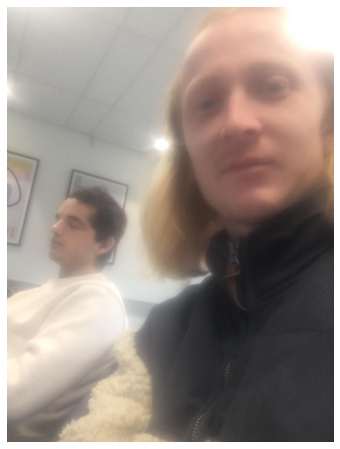

In [ ]:
# Create face detector
mtcnn = MTCNN(select_largest=False)

# Load a single image and display
#v_cap = cv2.VideoCapture('/kaggle/input/deepfake-detection-challenge/train_sample_videos/agqphdxmwt.mp4')
#success, frame = v_cap.read()

frame = cv2.imread("/content/ImageTest_MTCNN.jpeg")
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) #erreur due a une video vide
frame = Image.fromarray(frame)

plt.figure(figsize=(12, 8))
plt.imshow(frame)
plt.axis('off')

# Detect face
face = mtcnn(frame)
face.shape

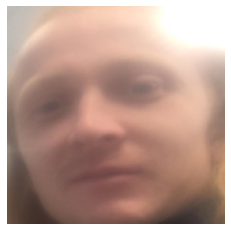

In [ ]:
# Create face detector
mtcnn = MTCNN(select_largest=False, post_process=False)

# Detect face
face = mtcnn(frame)

# Visualize
plt.imshow(face.permute(1, 2, 0).int().numpy())
plt.axis('off');

## Margin adjustement

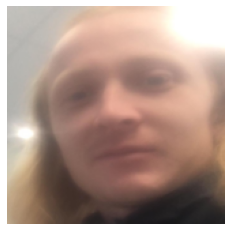

In [ ]:
# Create face detector
mtcnn = MTCNN(margin=40, select_largest=False, post_process=False)

# Detect face
face = mtcnn(frame)

# Visualize
plt.imshow(face.permute(1, 2, 0).int().numpy())
plt.axis('off');

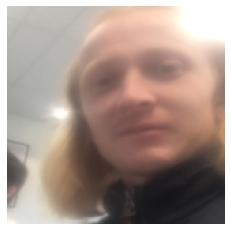

In [ ]:
# Create face detector
mtcnn = MTCNN(margin=70, select_largest=False, post_process=False)

# Detect face
face = mtcnn(frame)

# Visualize
plt.imshow(face.permute(1, 2, 0).int().numpy())
plt.axis('off');

## Multiple faces detection

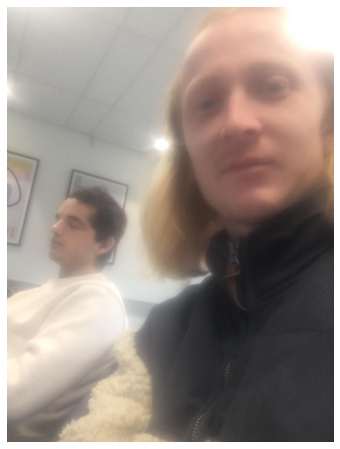

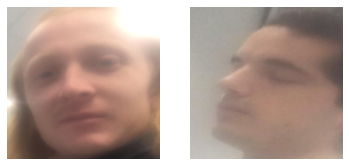

In [ ]:
# Create face detector
mtcnn = MTCNN(margin=20, keep_all=True, post_process=False)

# Load a single image and display
#v_cap = cv2.VideoCapture('/kaggle/input/deepfake-detection-challenge/train_sample_videos/avibnnhwhp.mp4')
#success, frame = v_cap.read()
frame = cv2.imread("/content/ImageTest_MTCNN.jpeg")
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame = Image.fromarray(frame)

plt.figure(figsize=(12, 8))
plt.imshow(frame)
plt.axis('off')
plt.show()

# Detect face
faces = mtcnn(frame)

# Visualize
fig, axes = plt.subplots(1, len(faces))
for face, ax in zip(faces, axes):
    ax.imshow(face.permute(1, 2, 0).int().numpy())
    ax.axis('off')
fig.show()

##Bounding boxes and facial *landmarks¶*

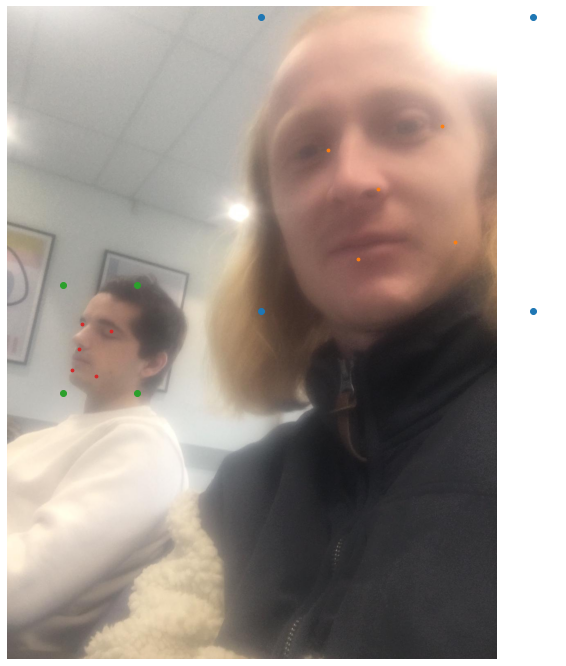

In [ ]:
# Create face detector
mtcnn = MTCNN(keep_all=True)

# Load a single image and display
frame = cv2.imread("/content/ImageTest_MTCNN.jpeg")
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame = Image.fromarray(frame)

# Detect face
boxes, probs, landmarks = mtcnn.detect(frame, landmarks=True)

# Visualize
fig, ax = plt.subplots(figsize=(16, 12))
ax.imshow(frame)
ax.axis('off')

for box, landmark in zip(boxes, landmarks):
    ax.scatter(*np.meshgrid(box[[0, 2]], box[[1, 3]]))
    ax.scatter(landmark[:, 0], landmark[:, 1], s=8)
fig.show()


In [ ]:
# Load a video
v_cap = cv2.VideoCapture('/kaggle/input/deepfake-detection-challenge/train_sample_videos/avibnnhwhp.mp4')

# Loop through video
batch_size = 32
frames = []
boxes = []
landmarks = []
view_frames = []
view_boxes = []
view_landmarks = []
for _ in tqdm(range(v_len)):
    
    # Load frame
    success, frame = v_cap.read()
    if not success:
        continue
        
    # Add to batch, resizing for speed
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = Image.fromarray(frame)
    frame = frame.resize([int(f * 0.25) for f in frame.size])
    frames.append(frame)
    
    # When batch is full, detect faces and reset batch list
    if len(frames) >= batch_size:
        batch_boxes, _, batch_landmarks = mtcnn.detect(frames, landmarks=True)
        boxes.extend(batch_boxes)
        landmarks.extend(batch_landmarks)
        
        view_frames.append(frames[-1])
        view_boxes.append(boxes[-1])
        view_landmarks.append(landmarks[-1])
        
        frames = []

# Visualize
fig, ax = plt.subplots(3, 3, figsize=(18, 12))
for i in range(9):
    ax[int(i / 3), i % 3].imshow(view_frames[i])
    ax[int(i / 3), i % 3].axis('off')
    for box, landmark in zip(view_boxes[i], view_landmarks[i]):
        ax[int(i / 3), i % 3].scatter(*np.meshgrid(box[[0, 2]], box[[1, 3]]), s=8)
        ax[int(i / 3), i % 3].scatter(landmark[:, 0], landmark[:, 1], s=6)

##Saving face *datasets*

In [ ]:
# Single image
mtcnn(frame, save_path='single_image.jpg');

# Batch
save_paths = [f'image_{i}.jpg' for i in range(len(frames))]
mtcnn(frames, save_path=save_paths);

In [ ]:
filenames = cv2.imread("/content/ImageTest_MTCNN.jpeg")

submission = []

if x_i is not None:
    prob = 1 / (1 + np.exp(-(bias + (weight * x_i).mean())))
else:
    prob = 0.5
submission.append([os.path.basename(filename), prob])

NameError: ignored